In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Set display all columns
pd.set_option('display.max_columns', None)

In [30]:
hydraulic_df = pd.read_parquet('Data/Silver/hydraulic_df.parquet', engine='pyarrow')
benchmark_df = pd.read_parquet('Data/Silver/benchmark_df.parquet', engine='pyarrow')

In [4]:
hydraulic_df.describe()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator,Stable_flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,31.299077,1.808399,2495.509203,6.198549,9.649453,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,55.287900,45.424567,50.365979,47.662121,40.735654,0.613315,41.240816,90.693878,0.669388,107.199546,0.342857
std,11.575330,0.278263,73.836682,1.032883,0.449246,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,8.960189,7.991933,7.396254,7.451888,8.107878,0.060260,42.383143,10.681802,0.817233,16.435848,0.474772
min,17.555983,1.062150,2361.747267,2.018572,8.857513,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,18.276617,35.313783,40.859400,38.245733,30.390800,0.524367,3.000000,73.000000,0.000000,90.000000,0.000000
25%,20.084650,1.550100,2442.933467,6.391670,9.203397,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,56.270183,36.237150,41.864183,39.123183,31.272567,0.555100,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.392533,1.739683,2480.926633,6.576673,9.692270,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,58.758150,44.836650,49.780583,47.070250,40.429050,0.610183,20.000000,100.000000,0.000000,100.000000,0.000000
75%,46.677383,2.148483,2548.211467,6.657508,10.155008,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,59.656900,54.104317,58.584467,55.694433,49.409500,0.649850,100.000000,100.000000,1.000000,130.000000,1.000000
max,47.903667,2.840100,2740.641000,6.722707,10.403098,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,60.755300,57.899283,61.958467,59.423167,53.060417,0.839067,100.000000,100.000000,2.000000,130.000000,1.000000


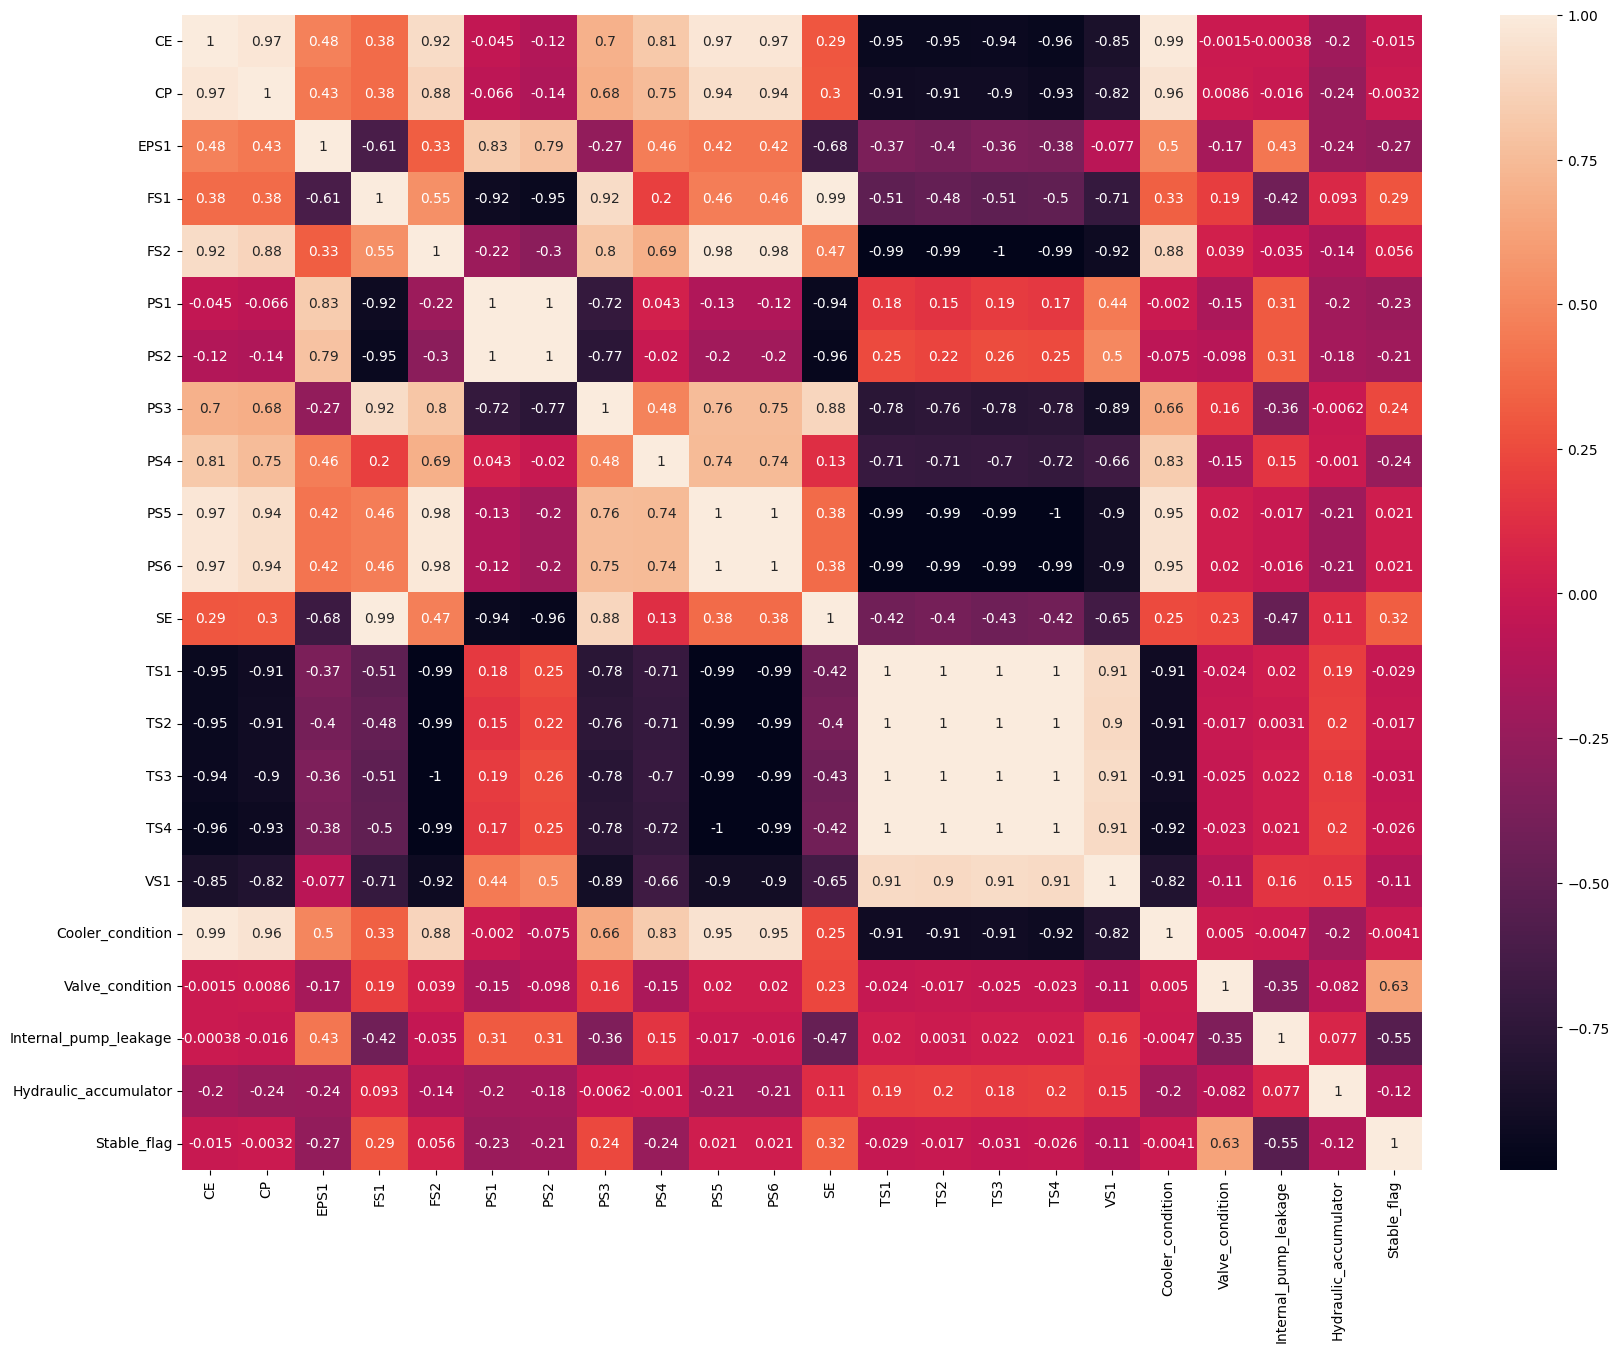

In [10]:
# Plot the correlation heatmap between feature and failure target
plt.figure(figsize=(20,15))
sns.heatmap(hydraulic_df.corr(), annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

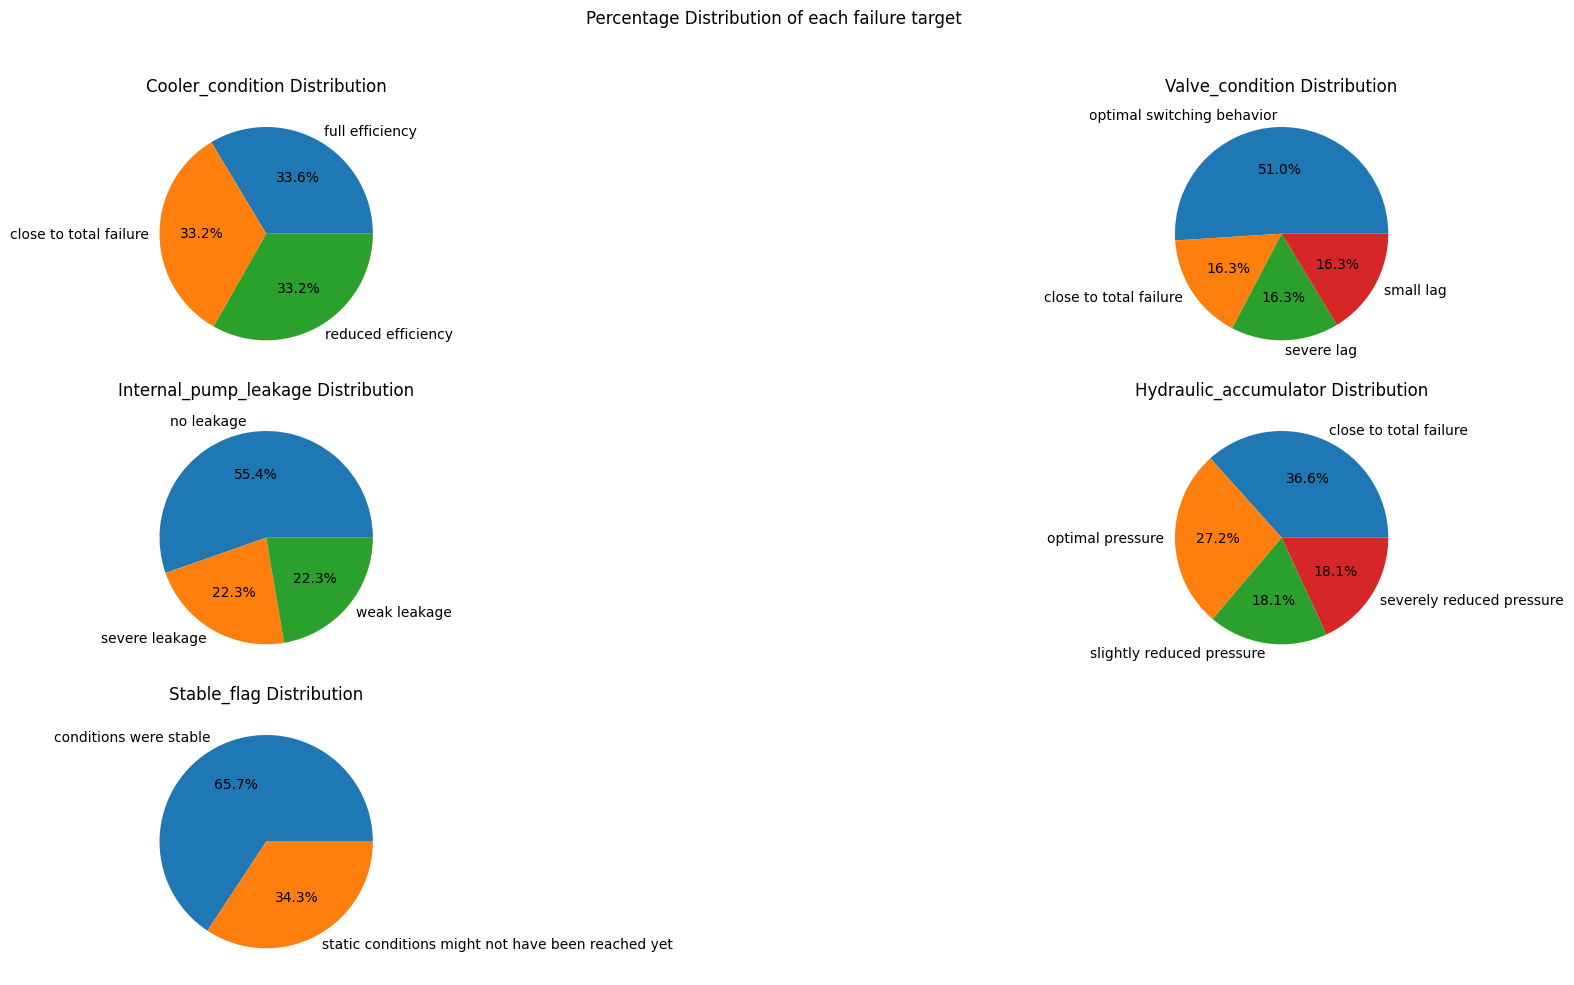

In [37]:
target_columns = ['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage', 'Hydraulic_accumulator', 'Stable_flag']

fig, axes = plt.subplots(3,2, figsize=(20,10))
axes = axes.flatten()

for i, col in enumerate(target_columns):
    value_counts = hydraulic_df[col].value_counts(normalize=True) * 100 
    legend = benchmark_df[benchmark_df['Benchmark'] == col].copy().set_index('Value')
    labels = value_counts.index.map(lambda x: legend.loc[x, 'Description'])

    axes[i].pie(value_counts, labels=labels, autopct = '%1.1f%%')
    axes[i].set_title(f"{col} Distribution")

fig.delaxes(axes[-1])
plt.suptitle("Percentage Distribution of each failure target")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show


In [29]:
hydraulic_df['Stable_flag'].unique()

array([1, 0])

In [31]:
benchmark_df

,Benchmark,Value,Description
0,Cooler_condition,3,close to total failure
1,Cooler_condition,20,reduced efficiency
2,Cooler_condition,100,full efficiency
3,Valve_condition,100,optimal switching behavior
4,Valve_condition,90,small lag
5,Valve_condition,80,severe lag
6,Valve_condition,73,close to total failure
7,Internal_pump_leakage,0,no leakage
8,Internal_pump_leakage,1,weak leakage
9,Internal_pump_leakage,2,severe leakage
